In [2]:
from magicgap import *

In [ ]:
d_range = np.arange(2, 7)
j_range = [d_j(d_s) for d_s in d_range]
sep_avg_magic = []
spinj_avg_magic = []
sym_qubit_avg_magic = []

qubit_avg_magic = avg_magic_analytic(2)
for d_s in d_range:
    j = d_j(d_s)
    n = int(2*j)
    B = sym_qubit_basis(j)
    sep_avg_magic.append(n*qubit_avg_magic)
    spinj_avg_magic.append(avg_magic_analytic(d_s))
    sym_qubit_avg_magic.append(avg_magic_subspace_multiqudit(wh_operators(*[2]*n), B, 2))
    save_data("sym_qubits", {"j_range": j_range,\
                             "sep_avg_magic": sep_avg_magic,\
                             "sym_qubit_avg_magic": sym_qubit_avg_magic})

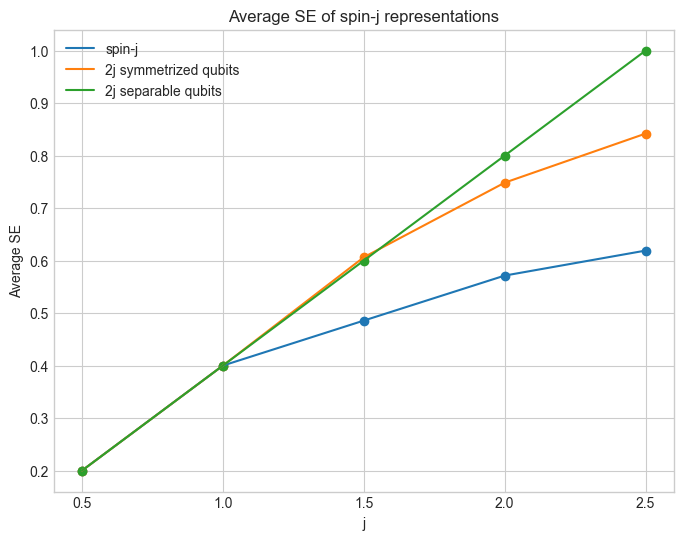

In [10]:
globals().update(load_data("sym_qubits"))
plt.style.use('seaborn-v0_8-whitegrid')

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
ax.plot(j_range, spinj_avg_magic, label="spin-j")
ax.scatter(j_range, spinj_avg_magic)
ax.plot(j_range, sym_qubit_avg_magic, label="2j symmetrized qubits")
ax.scatter(j_range, sym_qubit_avg_magic)
ax.plot(j_range, sep_avg_magic, label="2j separable qubits")
ax.scatter(j_range, sep_avg_magic)
ax.legend()
ax.set_title("Average SE of spin-j representations")
ax.set_xlabel("j")
ax.set_xticks(j_range)
ax.set_ylabel("Average SE")
ax.grid(True)
plt.savefig("img/sym_qubits.png")
plt.show()